In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
mnist = tf.keras.datasets.mnist

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

wine = pd.read_csv(r"C:\Users\16474\Downloads\winequality-red.csv")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


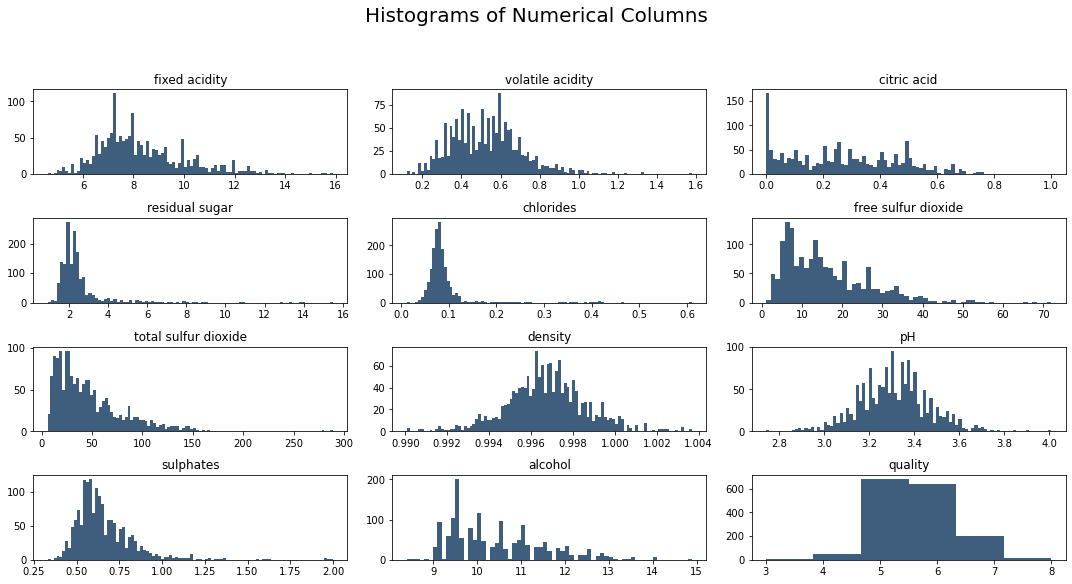

In [76]:
## Histograms

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(wine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(wine.columns.values[i])

    vals = np.size(wine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(wine.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [77]:
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [78]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

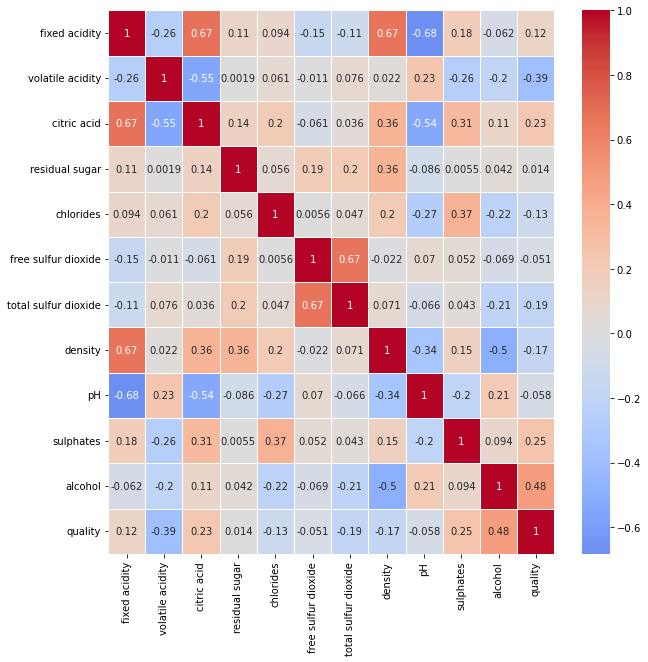

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

In [80]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
features_num = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [82]:
preprocessor = make_column_transformer((StandardScaler(), features_num))

In [83]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks


# Create training and validation splits
df_train = wine.sample(frac=0.7, random_state=0)
df_valid = wine.drop(df_train.index)

In [84]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

y_train = df_train['quality']
y_valid = df_valid['quality']

In [85]:
input_shape=X_train.shape[1]
print(input_shape)

11


In [86]:
X_train[:,0].mean() , X_train[:,0].std()

(4.571856744837106e-16, 1.0)

Minimum validation loss: 0.4812113344669342


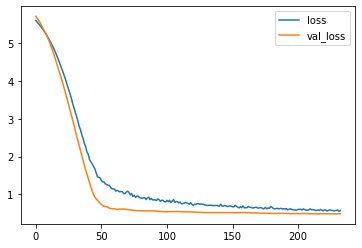

In [87]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=32, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    # the linear output layer 
    layers.Dense(units=1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


In [88]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [89]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, activation=tf.nn.relu),
  Dense(200, activation=tf.nn.relu),
  Dense(100, activation=tf.nn.relu),
  Dense(10, activation=tf.nn.softmax)
])

In [90]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1937 - accuracy: 0.9412


In [92]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9682


[0.10295494645833969, 0.9682000279426575]

In [93]:
sample_df = wine.iloc[67,:].drop(["quality"])
sample_df = pd.DataFrame(sample_df).T

In [94]:
sample_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.9962,3.44,0.58,10.7


In [95]:
sample_df = preprocessor.transform(sample_df)

In [96]:
sample_df

array([[-0.96817483,  1.02649389, -1.02809854, -0.71293283, -0.24716781,
        -0.95672703, -0.94892372, -0.29206204,  0.81404895, -0.4846475 ,
         0.24425854]])

In [98]:
wine.iloc[67,:]

fixed acidity            6.6000
volatile acidity         0.7050
citric acid              0.0700
residual sugar           1.6000
chlorides                0.0760
free sulfur dioxide      6.0000
total sulfur dioxide    15.0000
density                  0.9962
pH                       3.4400
sulphates                0.5800
alcohol                 10.7000
quality                  5.0000
Name: 67, dtype: float64

 ### observations

We could see the loss is high in the beginning. However, it descreases with the iterations. The training data has more loss when compared to the validation data. Also, The plot is showing us that it is giving better acuuracy in Validation testing.
